<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 기초통계정보 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) Title 변수 추가**

In [5]:
# 호칭 추출
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [6]:
# 대표 호칭 이외는 Others로 변경
main_tit_list = ['Mr', 'Miss', 'Mrs']
data.loc[data['Title'].isin(main_tit_list)==False, ['Title']] = 'Others'

**2) 결측치 처리**

In [7]:
# Age 중앙값으로 채우기
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace=True)

In [8]:
# Embarked 최빈값으로 채우기
data['Embarked'] = data['Embarked'].fillna('S')

**3) AgeGroup 변수 추가**

In [9]:
# 변수 추가
bins = [0, 16, 25, 35, 60, 100]
data['AgeGroup'] = pd.cut(data['Age'], 
                          bins=bins, 
                          labels=['0_16', '17_25', '26_35', '36_60', '61_100'])

**4) 불필요한 변수 제거**

In [10]:
# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin']
data.drop(drop_cols, axis=1, inplace=True)

**5) 가변수화**

In [11]:
# 가변수화
dummy_vars = ['Title', 'AgeGroup', 'Pclass', 'Sex', 'Embarked']

for v in dummy_vars:
    dummies = pd.get_dummies(data[v], prefix=v, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data.drop(v, axis=1, inplace=True)

**6) x, y 분리**

In [12]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target] 

**7) 정규화**

In [13]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**8) 학습용, 평가용 데이터 분리**

In [75]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 5가지 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 n_neighbors=5를 지정합니다.

In [15]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [17]:
# 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
# 예측하기
y_pred = model.predict(x_test)

In [19]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[152  16]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       168
           1       0.80      0.66      0.73       100

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



## 4.2.Decision Tree

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [20]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier

In [21]:
# 선언하기
model = DecisionTreeClassifier(max_depth=10, random_state=2022)

In [22]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=2022)

In [23]:
# 예측하기
y_pred = model.predict(x_test)

In [24]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[150  18]
 [ 37  63]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       168
           1       0.78      0.63      0.70       100

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



## 4.3.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [25]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier

In [26]:
# 선언하기
model = RandomForestClassifier(max_depth=10, random_state=2022)

In [27]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=2022)

In [28]:
# 예측하기
y_pred = model.predict(x_test)

In [29]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153  15]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       168
           1       0.82      0.67      0.74       100

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



## 4.4.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022를 지정합니다.

In [30]:
# 불러오기
from xgboost import XGBRFClassifier

In [31]:
# 선언하기
model = XGBRFClassifier(max_depth=10, random_state=2022)

In [32]:
# 학습하기
model.fit(x_train, y_train)

[14:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=2022, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [33]:
# 예측하기
y_pred = model.predict(x_test)

In [34]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[155  13]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       168
           1       0.84      0.66      0.74       100

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.83      0.82      0.82       268



### 4.5 튜닝하기 

In [76]:
# 불러오기
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [77]:
model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__colsample_bynode': 0.8,
 'estimator__learning_rate': 1.0,
 'estimator__reg_lambda': 1e-05,
 'estimator__subsample': 0.8,
 'estimator__use_label_encoder': True,
 'estimator__objective': 'binary:logistic',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bytree': None,
 'estimator__enable_categorical': False,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__predictor': None,
 'estimator__random_state': 2022,
 'estimator__reg_alpha': None,
 'estimator__scale_pos_weight': None,
 'estimator__tree_method':

In [78]:
# 매개 변수 값 범위 선언 
param = {'max_depth':range(5,21), 
         'n_estimators':range(10,150,5)}

In [79]:
# 기본 모델 선언
model_pr = XGBRFClassifier(random_state=2022)

In [80]:
# 튜닝하기 
model = RandomizedSearchCV(model_pr, 
                           param, 
                           cv=10, 
                           n_jobs=-1,
                           n_iter=50,
                           scoring='accuracy')

In [81]:
# 학습하기
model.fit(x_train, y_train)

[15:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None,
                                             enable_categorical=False,
                                             gamma=None, gpu_id=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_delta_step=None,
                                             max_depth=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             objectiv

In [82]:
# 확인
print(model.best_params_)
print(model.best_score_)

{'n_estimators': 20, 'max_depth': 6}
0.8384585289514866


In [83]:
#최적 파라미터로 학습된 최종 모델 
model.best_estimator_

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=20, n_jobs=8,
                num_parallel_tree=20, objective='binary:logistic',
                predictor='auto', random_state=2022, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [84]:
# 예측하기
y_pred = model.predict(x_test)

In [85]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107   7]
 [ 25  40]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       114
           1       0.85      0.62      0.71        65

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179



In [86]:
param = {'max_depth':range(5,16), 
         'n_estimators':range(80,150,5)}

model = GridSearchCV(model_pr, 
                     param, 
                     cv=10, 
                     n_jobs=-1,
                     scoring='accuracy')

model.fit(x_train, y_train)

[15:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None,
                                       enable_categorical=False, gamma=None,
                                       gpu_id=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       predictor=None, random_state=2022,
                                       reg_alpha=None, scale_pos_weight=N

In [87]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': 6, 'n_estimators': 90}
0.8398865414710486


In [88]:
model.best_estimator_

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=90, n_jobs=8,
                num_parallel_tree=90, objective='binary:logistic',
                predictor='auto', random_state=2022, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [89]:
# 예측하기
y_pred = model.predict(x_test)

In [90]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[104  10]
 [ 24  41]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       114
           1       0.80      0.63      0.71        65

    accuracy                           0.81       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.81      0.80       179



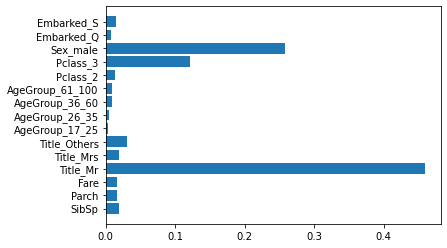

In [91]:
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()